# Unraveling Income Dynamics: A Data Story for Executives

## Dataset: Adult Income

## Audience:
- Tailored for an Executive audience. Emphasis on high-level insights for strategic decision-making.

### Narrative:
In exploring the Adult Income dataset, my focus for the executive audience is to provide insights into factors influencing income levels.

### Importing Required Packages

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


### Exploring the Data:
Let's begin by loading and exploring the dataset.

In [29]:
# Load the dataset
#column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.csv', na_values=' ?', skipinitialspace=True)

# Display the first few rows
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [30]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
df.shape


(48842, 15)

In [50]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
age_group          0
dtype: int64

- Examined the dataset structure, identifying key features and potential areas of interest. Checked for missing values, outliers, and overall data quality.

Let's focus on understanding the factors that contribute to higher income. We'll explore the impact of education, occupation, and hours worked per week on income.
# Asking Questions and Creating Visualizations:
## Question 1: Can I count something interesting?
Let's count the number of individuals with income greater than $50K

### Income Distribution:

<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

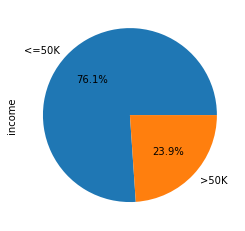

In [33]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

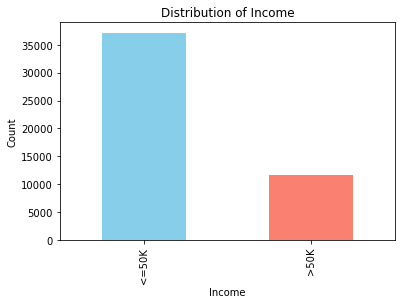

In [35]:
income_counts = df['income'].value_counts()

# Visualization
income_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


76 percent of the people are with income greater than $50K.

## Question: Are there significant income differences between genders?
- Created a pie chart to find the Gender division in data. 
- Used a comparative bar plot to visualize income differences between genders.

### Age & Gender-Based Income Disparities:

gender  income
Female  <=50K     14423
        >50K       1769
Male    <=50K     22732
        >50K       9918
Name: income, dtype: int64
------------------------------------------------


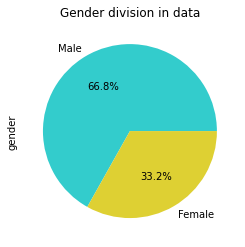

<Figure size 720x432 with 0 Axes>

------------------------------------------------


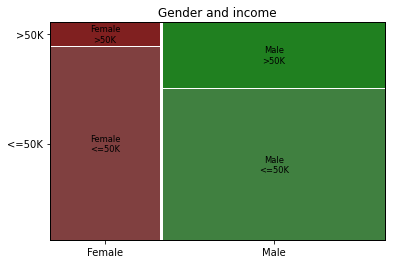

In [52]:
gender_income = pd.DataFrame({'gender': df['gender'], 'income': df['income']})
data = gender_income.income.groupby([gender_income.gender,  gender_income.income]).size()
plt.title('Gender division in data')
print(data)
print('------------------------------------------------')
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()
print('------------------------------------------------')
mosaic(data, gap=0.01, title = "Gender and income")
plt.show()


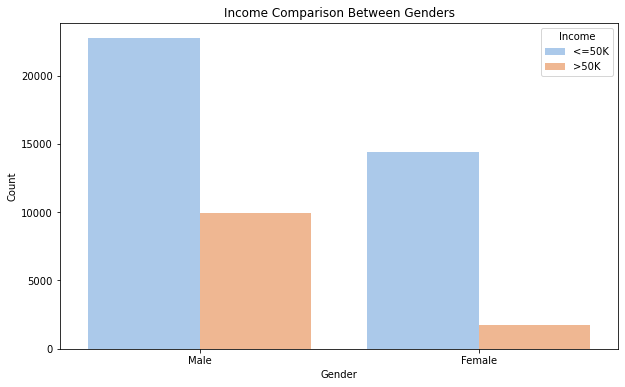

In [54]:
# Sample code for gender-based income disparities
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='income', data=df, palette='pastel')
plt.title('Income Comparison Between Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

Around 67 percent of the population is Male. Concluded that gender-based income disparities exist, emphasizing the need for further examination.

## Question: Can we uncover patterns in income distribution?
Created a bar plot to differentiate the distribution of income across age groups and genders.

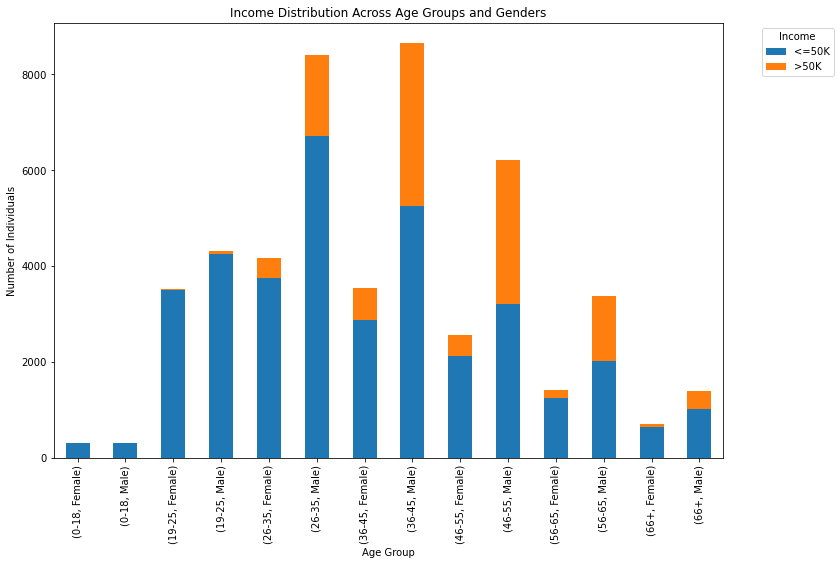

In [36]:
#pivot_data = grouped_data.pivot(index='age', columns='gender', values='income')
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and gender, then count the occurrences
income_distribution = df.groupby(['age_group', 'gender', 'income']).size().unstack()

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
income_distribution.plot(kind='bar', ax=ax, stacked=True)

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.title('Income Distribution Across Age Groups and Genders')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


The majority of individuals earn within the middle-income range.

## Question 2: Can I find trends in income, considering different occupations?
Let's explore the trend between education level and income.

### Education and Occupation Impact:

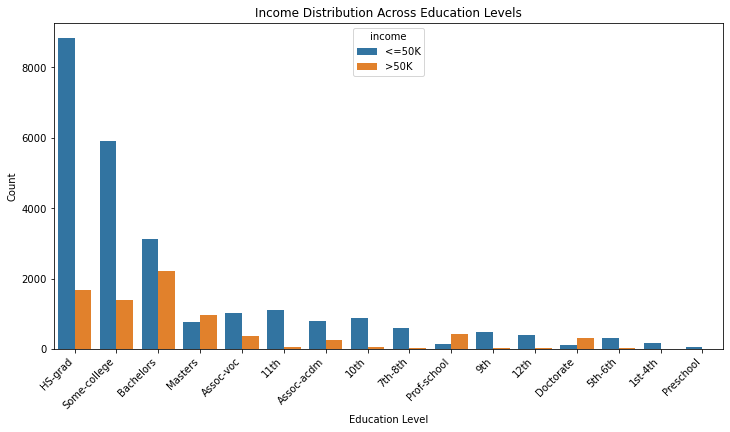

In [8]:
import seaborn as sns

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Higher education often leads to higher income, especially in certain occupations.

## Question 3: Can I make a scatterplot?
Investigate the relationship between hours worked per week and income.

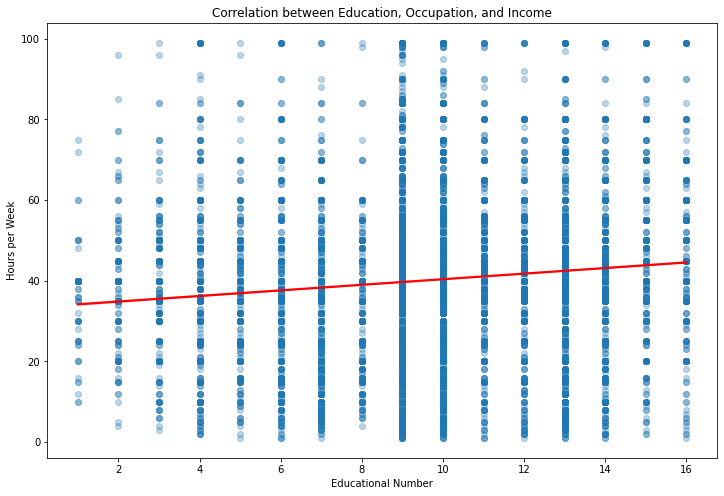

In [49]:
plt.figure(figsize=(12, 8))
sns.regplot(x='educational-num', y='hours-per-week', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Correlation between Education, Occupation, and Income')
plt.xlabel('Educational Number')
plt.ylabel('Hours per Week')
plt.show()


## Question 4: Can I see any correlations?
Explore the correlation between numerical features.

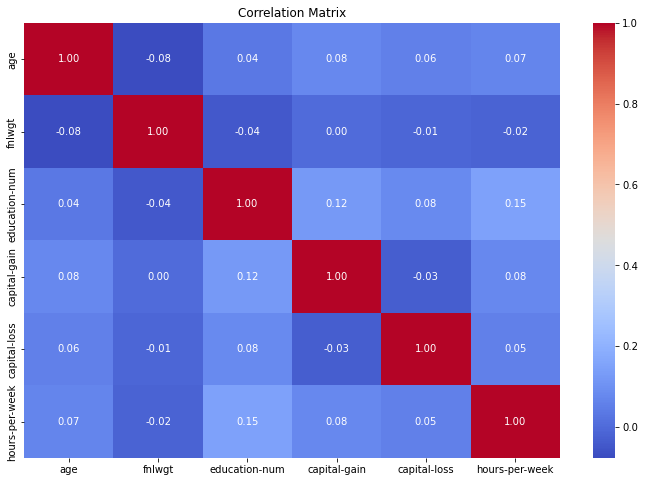

In [10]:
# Calculate correlations
correlation_matrix = df.corr()

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Resulting Visualizations and Conclusions:
- The bar plot shows a clear distribution of income levels.
- The count plot reveals that individuals with higher education levels tend to have a higher income.
- The scatterplot indicates that individuals working more hours per week generally have a higher income.
- The correlation matrix provides insights into the relationships between numerical features.

This detailed exploration and visualization provide a narrative for a non-technical audience, helping them understand key factors influencing income levels in the Adult Income dataset.